<a href="https://colab.research.google.com/github/ankitakarn9/Corona_virus-Prediction_project/blob/master/Corona_virus_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup

In [ ]:
# get data

# link at which web data recides
link = 'https://www.mohfw.gov.in/'
# get web data
req = requests.get(link)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

In [ ]:
# find the table
# ==============
# our target table is the last table in the page

# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# print(thead)

# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)

# get the table tbody
# it contains the contents
tbody = soup.find_all('tbody')[-1]
# print(tbody)

# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)

In [ ]:
# get the table contents
# ======================

# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
# print(head_rows)

In [ ]:
# save contents in a dataframe
# ============================
    
# skip last 3 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6], 
                     columns=head_rows[0])         

# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)

# there are 36 states+UT in India
df_bs.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,50,50,0,100
1,Andhra Pradesh,8071,6988,193,15252
2,Arunachal Pradesh,128,66,1,195
3,Assam,2719,5851,12,8582
4,Bihar,2233,7946,70,10249
5,Chandigarh,73,367,6,446
6,Chhattisgarh,623,2303,14,2940
7,Dadra and Nagar Haveli and Daman and Diu,129,86,0,215
8,Delhi,27007,59992,2803,89802
9,Goa,713,670,4,1387


In [ ]:
# date-time information
# =====================
#saving a copy of the dataframe
df_India = df_bs.copy()
# today's date
now  = datetime.now()
# format date to month-day-year
df_India['Date'] = now.strftime("%m/%d/%Y") 

# add 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')

# df_India.head(36)

In [ ]:
# number of unique values 
df_India.nunique()

Name of State / UT            35
Active Cases*                 35
Cured/Discharged/Migrated*    35
Deaths**                      26
Total Confirmed cases*        35
Date                           1
dtype: int64

In [ ]:
# fix datatype
df_India['Date'] = pd.to_datetime(df_India['Date'])

# **State with most recent COVID-19 case**



In [ ]:
df_India.head(36)

In [ ]:
# complete data info
df_India.info()

In [ ]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'

# location for saving the file
file_loc = '/content/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

In [ ]:
#Learn how to read a .csv file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_csv('/content/2020_07_02 - COVID-19_India_preprocessed.csv')
df_india = df.copy()
df

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date
0,Andaman and Nicobar Islands,50,50,0,100,2020-07-02
1,Andhra Pradesh,8071,6988,193,15252,2020-07-02
2,Arunachal Pradesh,128,66,1,195,2020-07-02
3,Assam,2719,5851,12,8582,2020-07-02
4,Bihar,2233,7946,70,10249,2020-07-02
5,Chandigarh,73,367,6,446,2020-07-02
6,Chhattisgarh,623,2303,14,2940,2020-07-02
7,Dadra and Nagar Haveli and Daman and Diu,129,86,0,215,2020-07-02
8,Delhi,27007,59992,2803,89802,2020-07-02
9,Goa,713,670,4,1387,2020-07-02


In [ ]:
daily = df.sort_values(['Date','Name of State / UT','Active Cases*'])
latest = df[df.Date == daily.Date.max()]
latest.head()

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date,Total Active
0,Andaman and Nicobar Islands,50,50,0,100,2020-07-02,50
1,Andhra Pradesh,8071,6988,193,15252,2020-07-02,8071
2,Arunachal Pradesh,128,66,1,195,2020-07-02,128
3,Assam,2719,5851,12,8582,2020-07-02,2719
4,Bihar,2233,7946,70,10249,2020-07-02,2233


## **Total number of active COVID-19 cases in India:** 



In [ ]:
total_active = total_cases-total_cured-total_death
print("Total active COVID-19 cases as of "+today+" are: ",total_active)

Total active COVID-19 cases as of 2020_07_02 are:  220115


#**Total number of COVID-19 cases in India till date**

In [ ]:
total_cases = df['Total Confirmed cases*'].sum()
print("Total number of COVID-19 cases in India till date "+today+" are: ", total_cases)

Total number of COVID-19 cases in India till date 2020_07_02 are:  597809


In [ ]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total Confirmed cases*'] - (df['Deaths**'] + df['Cured/Discharged/Migrated*'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 220115


,Total Active
Name of State / UT,
Maharashtra,79091
Tamil Nadu,39859
Delhi,27007
Telangana,9008
Karnataka,8198
Andhra Pradesh,8071
Gujarat,7335
Uttar Pradesh,6709
West Bengal,5959


In [ ]:
import pandas as pd
age_details = pd.read_csv('/content/sample_data/agedetails.csv')

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

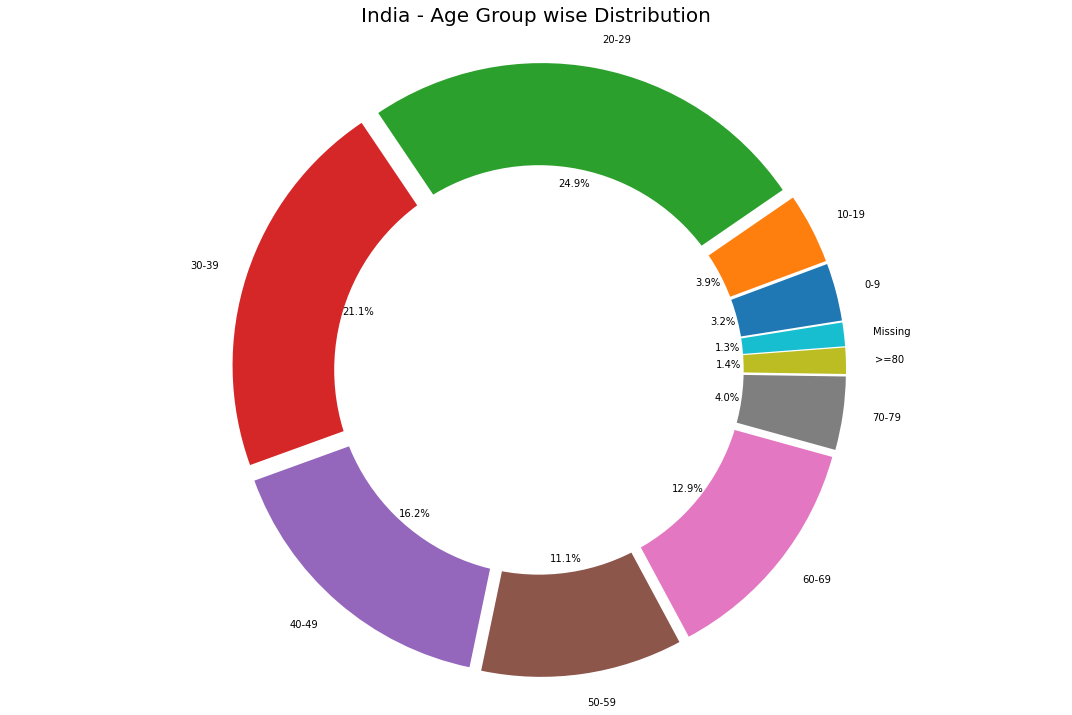

In [ ]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

# **Multiple Visualization of the spread of COVID-19 in India and Iran**

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from datetime import date, timedelta
from statsmodels.tsa.arima_model import ARIMA
from sklearn.cluster import KMeans
from fbprophet import Prophet

**Spread total cases over time in Iran and India** 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete (1).csv


In [ ]:
import io
import pandas as pd
data1 = pd.read_csv(io.BytesIO(uploaded['covid_19_clean_complete.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_data.csv to covid_19_data (1).csv


In [ ]:
import io
import pandas as pd
cases = pd.read_csv(io.BytesIO(uploaded['covid_19_data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving COVID19_open_line_list.csv to COVID19_open_line_list (1).csv


In [ ]:
import io
import pandas as pd
age = pd.read_csv(io.BytesIO(uploaded['COVID19_open_line_list.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
data1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
data1.shape

(42021, 10)

In [ ]:
data1.isna().sum()

Province/State    29463
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
daily = data1.sort_values(['Date','Country/Region','Province/State'])
latest = data1[data1.Date == daily.Date.max()]
latest.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
41760,NaN,Afghanistan,33.0000,65.0000,2020-06-30,31517,746,14131,16640,Eastern Mediterranean
41761,NaN,Albania,41.1533,20.1683,2020-06-30,2535,62,1459,1014,Europe
41762,NaN,Algeria,28.0339,1.6596,2020-06-30,13907,912,9897,3098,Africa
41763,NaN,Andorra,42.5063,1.5218,2020-06-30,855,52,799,4,Europe
41764,NaN,Angola,-11.2027,17.8739,2020-06-30,284,13,93,178,Africa


In [ ]:
data=latest.rename(columns={ "Country/Region": "country", "Province/State": "state","Confirmed":"confirm","Deaths": "death","Recovered":"recover"})
data.head()

,state,country,Lat,Long,Date,confirm,death,recover,Active,WHO Region
41760,NaN,Afghanistan,33.0000,65.0000,2020-06-30,31517,746,14131,16640,Eastern Mediterranean
41761,NaN,Albania,41.1533,20.1683,2020-06-30,2535,62,1459,1014,Europe
41762,NaN,Algeria,28.0339,1.6596,2020-06-30,13907,912,9897,3098,Africa
41763,NaN,Andorra,42.5063,1.5218,2020-06-30,855,52,799,4,Europe
41764,NaN,Angola,-11.2027,17.8739,2020-06-30,284,13,93,178,Africa


In [ ]:
iran_data = data1[data1['Country/Region']=='Iran']
idata = iran_data.tail(22)
idata.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
36410,NaN,Iran,32.0,53.0,2020-06-09,175927,8425,138457,29045,Eastern Mediterranean
36671,NaN,Iran,32.0,53.0,2020-06-10,177938,8506,140590,28842,Eastern Mediterranean
36932,NaN,Iran,32.0,53.0,2020-06-11,180156,8584,142663,28909,Eastern Mediterranean
37193,NaN,Iran,32.0,53.0,2020-06-12,182525,8659,144649,29217,Eastern Mediterranean
37454,NaN,Iran,32.0,53.0,2020-06-13,184955,8730,146748,29477,Eastern Mediterranean


In [ ]:
iran_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,161.0,32.000000,0.000000,32.0,32.0,32.0,32.0,32.0
Long,161.0,53.000000,0.000000,53.0,53.0,53.0,53.0,53.0
Confirmed,161.0,76154.254658,71932.773081,0.0,1501.0,70029.0,129341.0,227662.0
Deaths,161.0,4132.304348,3568.740634,0.0,66.0,4357.0,7249.0,10817.0
Recovered,161.0,56756.857143,59193.097830,0.0,291.0,41947.0,100564.0,188758.0
Active,161.0,15265.093168,11546.208621,0.0,1144.0,15485.0,25563.0,34887.0


In [ ]:
cmap1 = iran_data
cmap1  = cmap1.groupby(['Date', 'Country/Region','Lat','Long'])['Confirmed', 'Deaths', 'Recovered'].max()


cmap1 = cmap1.reset_index()
cmap1.head()
cmap1['size'] = cmap1['Confirmed']*90000000
cmap1
fig = px.scatter_mapbox(cmap1, lat="Lat", lon="Long",
                     color="Confirmed", size='size',hover_data=['Confirmed','Recovered','Deaths'],
                     color_continuous_scale='burgyl',
                     animation_frame="Date", 
                     title='Spread total cases over time')
fig.update(layout_coloraxis_showscale=True)
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3)
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

In [ ]:
india_data = data1[data1['Country/Region']=='India']
idata2 = india_data.tail(22)
idata2.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
36408,NaN,India,21.0,78.0,2020-06-09,276146,7750,134670,133726,South-East Asia
36669,NaN,India,21.0,78.0,2020-06-10,286605,8102,135206,143297,South-East Asia
36930,NaN,India,21.0,78.0,2020-06-11,297535,8498,147195,141842,South-East Asia
37191,NaN,India,21.0,78.0,2020-06-12,308993,8884,154330,145779,South-East Asia
37452,NaN,India,21.0,78.0,2020-06-13,320922,9195,162379,149348,South-East Asia


In [ ]:
cmap2 = india_data
cmap2  = cmap1.groupby(['Date', 'Country/Region','Lat','Long'])['Confirmed', 'Deaths', 'Recovered'].max()


cmap2 = cmap2.reset_index()
cmap2.head()
cmap2['size'] = cmap2['Confirmed']*90000000
cmap2
fig = px.scatter_mapbox(cmap1, lat="Lat", lon="Long",
                     color="Confirmed", size='size',hover_data=['Confirmed','Recovered','Deaths'],
                     color_continuous_scale='burgyl',
                     animation_frame="Date", 
                     title='Spread total cases over time')
fig.update(layout_coloraxis_showscale=True)
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3)
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

**Confirmation vs Recoverey vs Death in Iran**

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


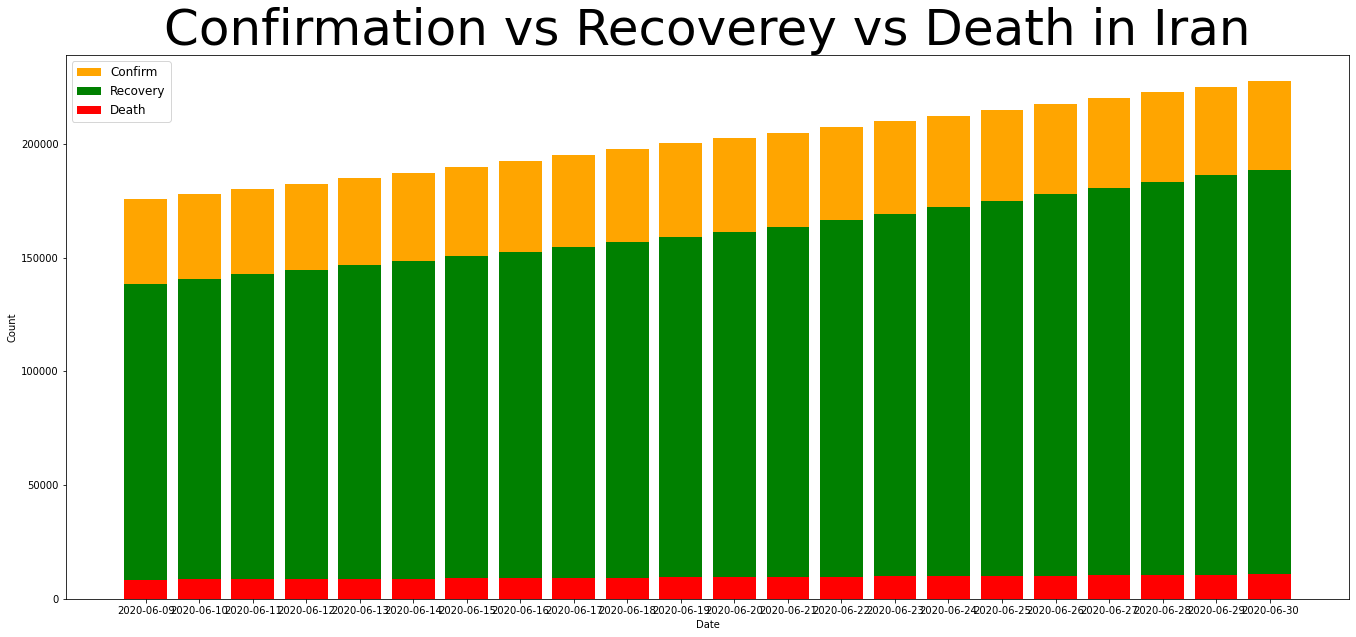

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

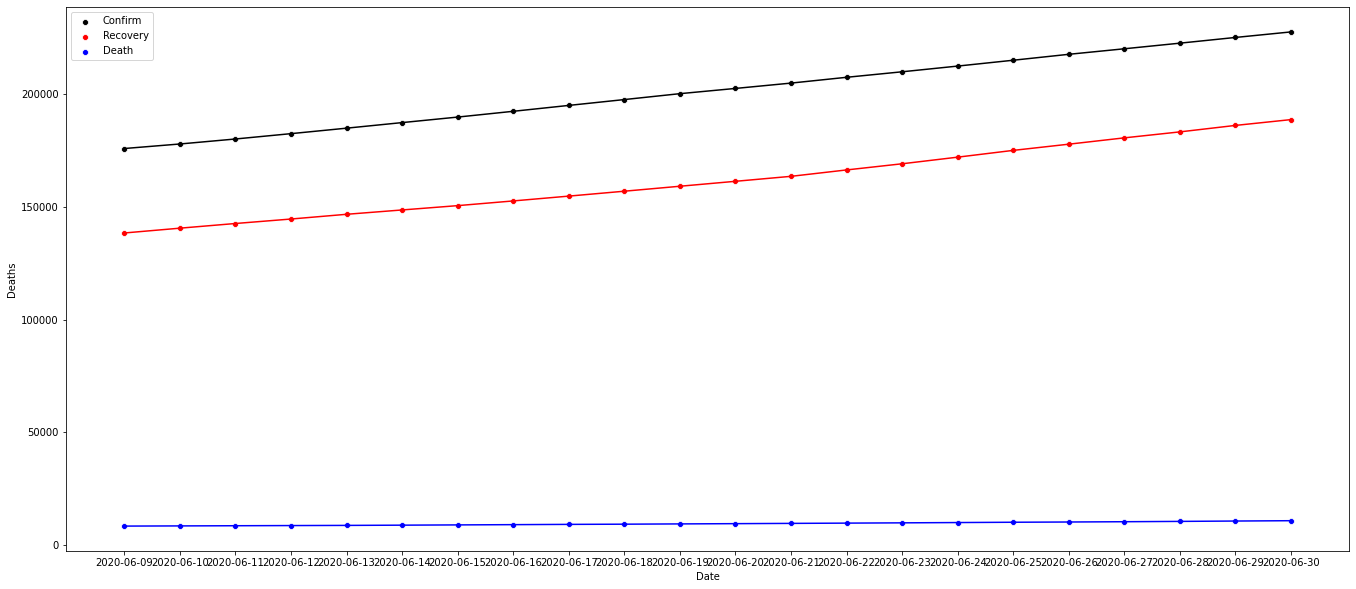

In [ ]:
plt.figure(figsize=(23,10))
plt.bar(idata.Date, idata.Confirmed,label="Confirm",color="orange")
plt.bar(idata.Date, idata.Recovered,label="Recovery",color="green")
plt.bar(idata.Date, idata.Deaths,label="Death",color="red")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title("Confirmation vs Recoverey vs Death in Iran",fontsize=50)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="Confirmed", data=idata,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="Date", y="Recovered", data=idata,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="Date", y="Deaths", data=idata,
             color="blue",label = "Death")
plt.plot(idata.Date,idata.Confirmed,zorder=1,color="black")
plt.plot(idata.Date,idata.Recovered,zorder=1,color="red")
plt.plot(idata.Date,idata.Deaths,zorder=1,color="blue")

**Confirmation vs Recoverey vs Death in India**


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


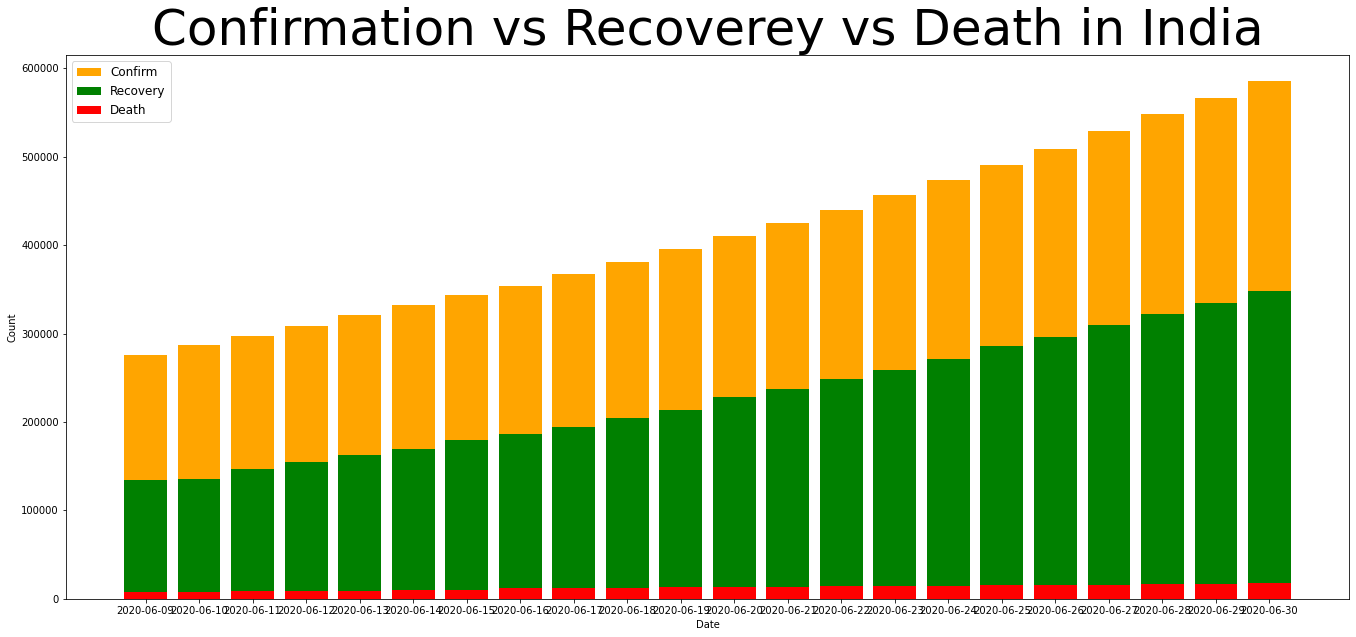

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

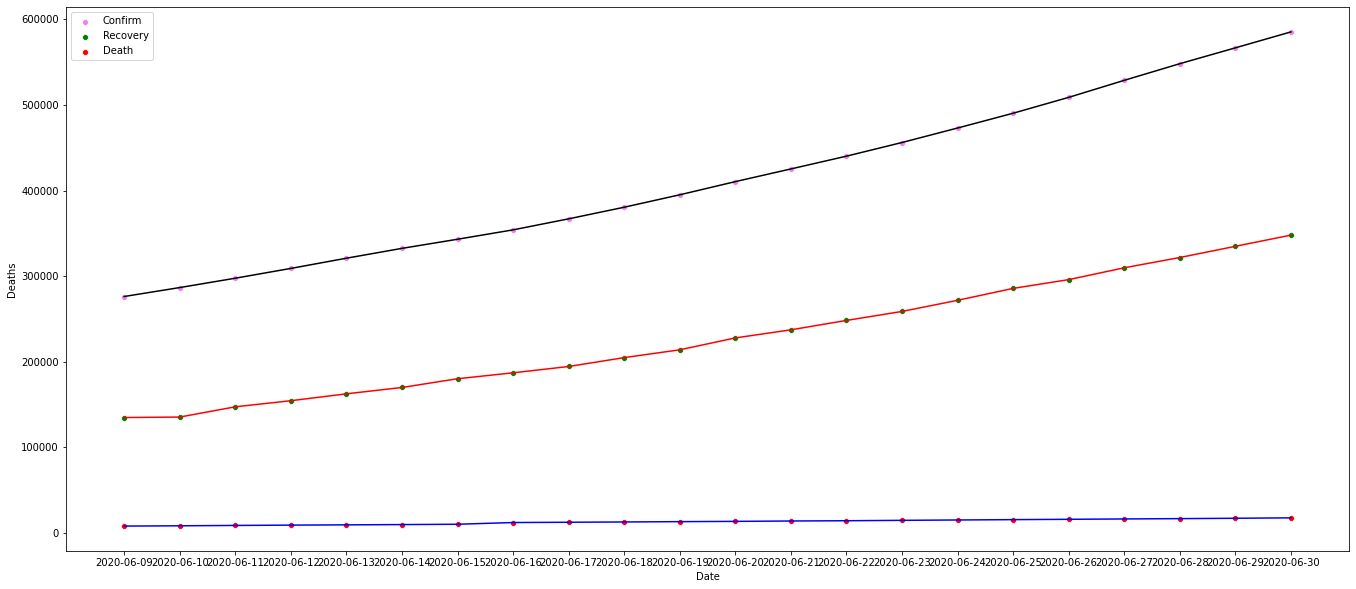

In [ ]:
plt.figure(figsize=(23,10))
plt.bar(idata2.Date, idata2.Confirmed,label="Confirm",color="orange")
plt.bar(idata2.Date, idata2.Recovered,label="Recovery",color="green")
plt.bar(idata2.Date, idata2.Deaths,label="Death",color="red")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title("Confirmation vs Recoverey vs Death in India",fontsize=50)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="Confirmed", data=idata2,
             color="violet",label = "Confirm")
ax=sns.scatterplot(x="Date", y="Recovered", data=idata2,
             color="green",label = "Recovery")
ax=sns.scatterplot(x="Date", y="Deaths", data=idata2,
             color="red",label = "Death")
plt.plot(idata2.Date,idata2.Confirmed,zorder=1,color="black")
plt.plot(idata2.Date,idata2.Recovered,zorder=1,color="red")
plt.plot(idata2.Date,idata2.Deaths,zorder=1,color="blue")

**Daily Change in Iran and India**


In [ ]:
idata['Confirmed_new'] = idata['Confirmed']-idata['Confirmed'].shift(1)
idata['Recovered_new'] = idata['Recovered']-idata['Recovered'].shift(1)
idata['Deaths_new'] = idata['Deaths']-idata['Deaths'].shift(1)

In [ ]:
idata = idata.fillna(0)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


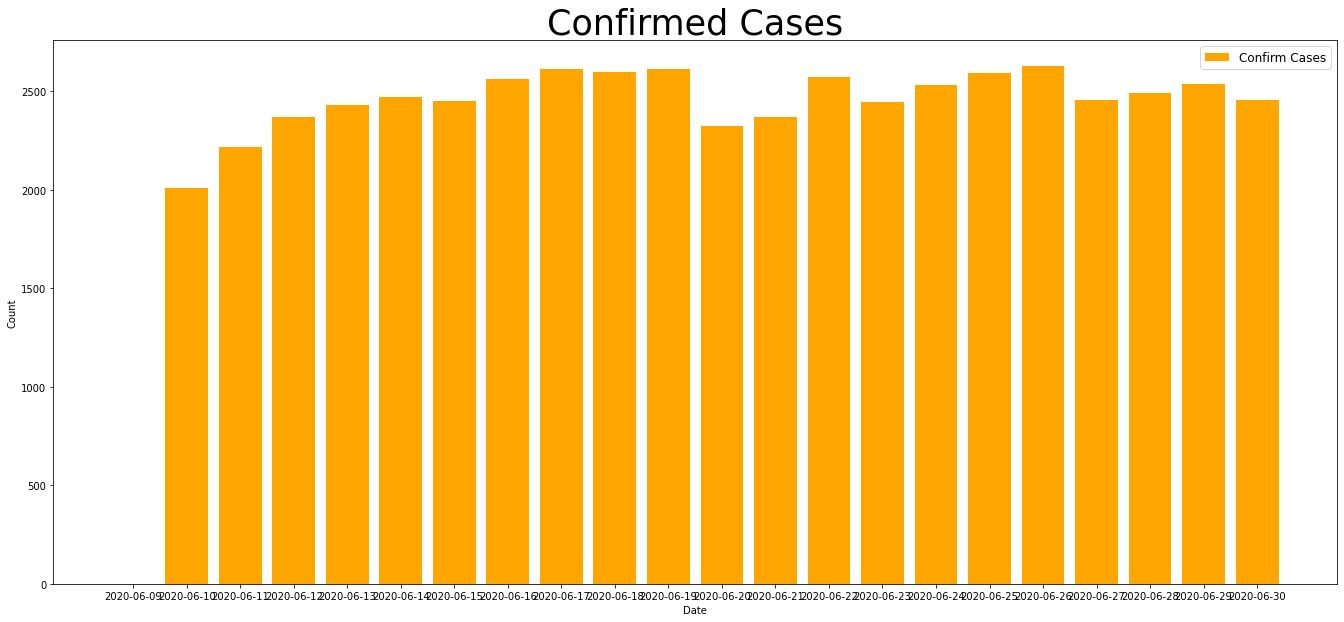

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


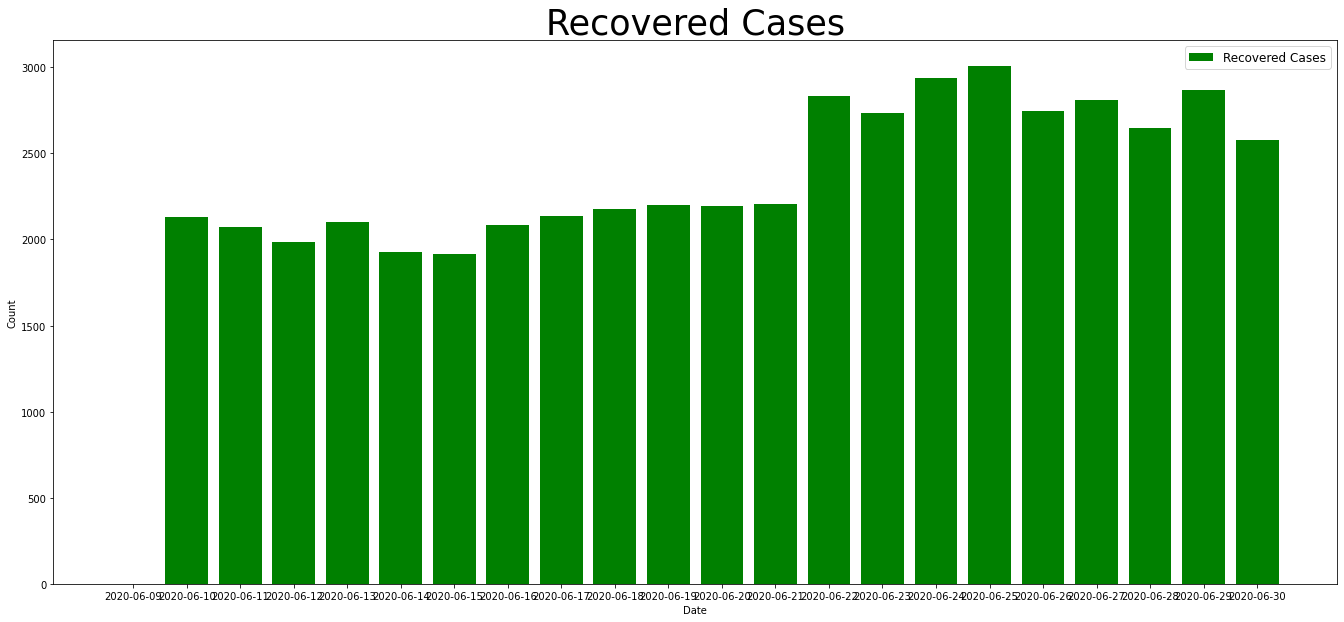

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


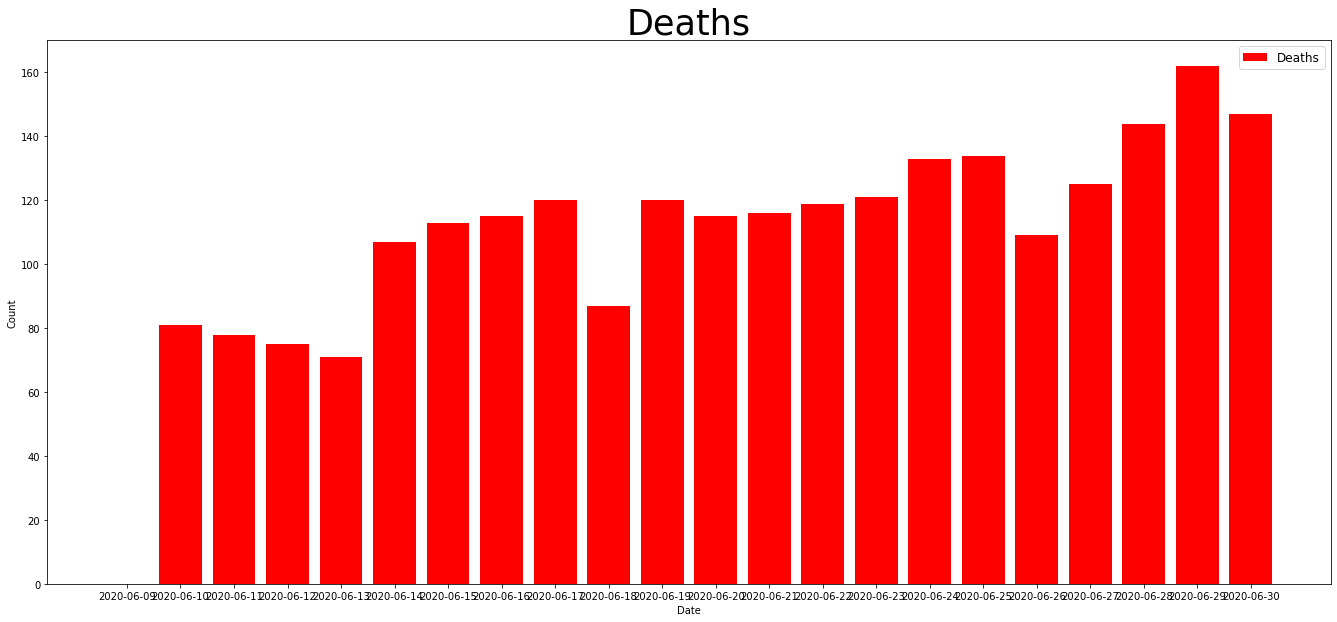

In [ ]:
plt.figure(figsize=(23,10))
plt.bar(idata.Date, idata.Confirmed_new,label="Confirm Cases",color="orange")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed Cases',fontsize = 35)
plt.show()


plt.figure(figsize=(23,10))
plt.bar(idata.Date, idata.Recovered_new,label="Recovered Cases",color="green")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Recovered Cases',fontsize = 35)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(idata.Date, idata.Deaths_new,label="Deaths",color="red")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Deaths',fontsize = 35)
plt.show()


# **Forecasting data of Iran using Prophet**

**For Confirmed Cases in Iran**

In [ ]:
prophet=iran_data.iloc[: , [4,5 ]].copy() 
prophet.tail(10)
prophet.columns = ['ds','y']
prophet.tail(10)

,ds,y
39542,2020-06-21,204952
39803,2020-06-22,207525
40064,2020-06-23,209970
40325,2020-06-24,212501
40586,2020-06-25,215096
40847,2020-06-26,217724
41108,2020-06-27,220180
41369,2020-06-28,222669
41630,2020-06-29,225205
41891,2020-06-30,227662


In [ ]:
m1=Prophet(interval_width=0.97)
m1.fit(prophet)
future=m1.make_future_dataframe(periods=15)
forecast1=m1.predict(future)
forecast1.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
166,2020-07-06,242855.890543,239243.861678,245896.878898,239062.066623,246039.989378,-7.616146,-7.616146,-7.616146,-7.616146,-7.616146,-7.616146,0.0,0.0,0.0,242848.274397
167,2020-07-07,245363.358765,240669.374307,249553.104140,240744.416316,249223.318127,-65.764269,-65.764269,-65.764269,-65.764269,-65.764269,-65.764269,0.0,0.0,0.0,245297.594495
168,2020-07-08,247870.826986,242424.005525,252833.779949,242426.322762,252797.714626,-44.112929,-44.112929,-44.112929,-44.112929,-44.112929,-44.112929,0.0,0.0,0.0,247826.714057
169,2020-07-09,250378.295208,243887.735399,255998.368231,244046.675351,256191.296958,-25.886656,-25.886656,-25.886656,-25.886656,-25.886656,-25.886656,0.0,0.0,0.0,250352.408551
170,2020-07-10,252885.763429,246120.263631,259614.338426,245708.110573,259523.628106,86.612439,86.612439,86.612439,86.612439,86.612439,86.612439,0.0,0.0,0.0,252972.375868
171,2020-07-11,255393.231650,247104.183173,263116.904321,247254.404764,262986.526730,55.047697,55.047697,55.047697,55.047697,55.047697,55.047697,0.0,0.0,0.0,255448.279348
172,2020-07-12,257900.699872,248594.064663,266491.856046,248582.610487,266422.755334,1.719865,1.719865,1.719865,1.719865,1.719865,1.719865,0.0,0.0,0.0,257902.419737
173,2020-07-13,260408.168093,250186.408127,269771.575690,249822.389513,269976.325702,-7.616146,-7.616146,-7.616146,-7.616146,-7.616146,-7.616146,0.0,0.0,0.0,260400.551947
174,2020-07-14,262915.636315,251213.226430,273725.515055,251064.568407,273533.284895,-65.764269,-65.764269,-65.764269,-65.764269,-65.764269,-65.764269,0.0,0.0,0.0,262849.872045
175,2020-07-15,265423.104536,252600.128718,277377.934729,252815.563372,277420.244866,-44.112929,-44.112929,-44.112929,-44.112929,-44.112929,-44.112929,0.0,0.0,0.0,265378.991607


In [ ]:
cnfrm1 = forecast1.loc[:,['ds','trend']]
cnfrm1 = cnfrm1[cnfrm1['trend']>0]
cnfrm1=cnfrm1.tail(10)
cnfrm1.columns = ['Date','Confirm']
cnfrm1.head()

,Date,Confirm
166,2020-07-06,242855.890543
167,2020-07-07,245363.358765
168,2020-07-08,247870.826986
169,2020-07-09,250378.295208
170,2020-07-10,252885.763429


**Graphical Representation of Predicted Death in Iran**

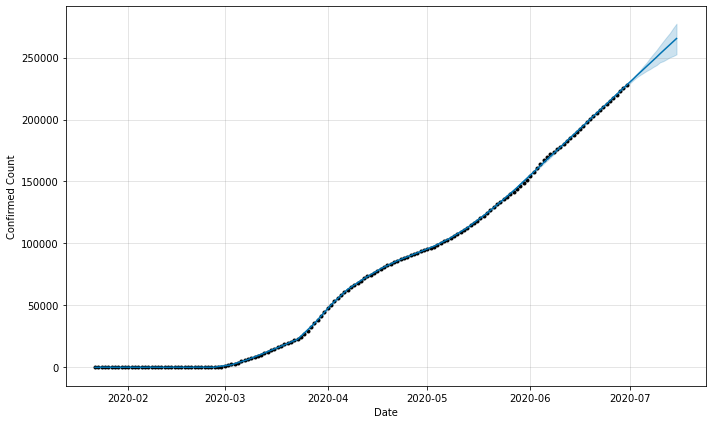

In [ ]:
figure1 = plot_plotly(m, forecast)
py.iplot(figure1) 

figure1 = m.plot(forecast1,xlabel='Date',ylabel='Confirmed Count')

**For Recovery Cases in Iran**

In [ ]:
prophet_rec1=iran_data.iloc[: , [4,7 ]].copy() 
prophet_rec1.tail(10)
prophet_rec1.columns = ['ds','y']
prophet_rec1.tail(10)

,ds,y
39542,2020-06-21,163591
39803,2020-06-22,166427
40064,2020-06-23,169160
40325,2020-06-24,172096
40586,2020-06-25,175103
40847,2020-06-26,177852
41108,2020-06-27,180661
41369,2020-06-28,183310
41630,2020-06-29,186180
41891,2020-06-30,188758


In [ ]:
m_rec1=Prophet(interval_width=0.97)
m_rec1.fit(prophet_rec)
future_rec=m_rec1.make_future_dataframe(periods=15)
forecast_rec1=m_rec1.predict(future_rec)
forecast_rec1

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-683.970289,-17789.384743,14617.117221,-683.970289,-683.970289,-1023.980207,-1023.980207,-1023.980207,-1023.980207,-1023.980207,-1023.980207,0.0,0.0,0.0,-1707.950496
1,2020-01-23,-663.641779,-17917.517800,16261.601485,-663.641779,-663.641779,-527.086848,-527.086848,-527.086848,-527.086848,-527.086848,-527.086848,0.0,0.0,0.0,-1190.728626
2,2020-01-24,-643.313268,-17672.848002,16569.642997,-643.313268,-643.313268,-233.496620,-233.496620,-233.496620,-233.496620,-233.496620,-233.496620,0.0,0.0,0.0,-876.809888
3,2020-01-25,-622.984757,-17646.685428,15418.936706,-622.984757,-622.984757,205.302623,205.302623,205.302623,205.302623,205.302623,205.302623,0.0,0.0,0.0,-417.682134
4,2020-01-26,-602.656247,-15998.616588,17208.969514,-602.656247,-602.656247,286.054471,286.054471,286.054471,286.054471,286.054471,286.054471,0.0,0.0,0.0,-316.601776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2020-07-11,393333.680833,376354.810056,410788.699547,384076.587549,401636.646274,205.302623,205.302623,205.302623,205.302623,205.302623,205.302623,0.0,0.0,0.0,393538.983457
172,2020-07-12,400890.006493,380937.092051,418883.819585,390292.625542,410559.501441,286.054471,286.054471,286.054471,286.054471,286.054471,286.054471,0.0,0.0,0.0,401176.060964
173,2020-07-13,408446.332153,389009.890037,428228.535602,396525.535846,419321.684867,539.214727,539.214727,539.214727,539.214727,539.214727,539.214727,0.0,0.0,0.0,408985.546880
174,2020-07-14,416002.657813,395444.086019,435747.599341,402760.714744,427920.078003,753.991854,753.991854,753.991854,753.991854,753.991854,753.991854,0.0,0.0,0.0,416756.649667


In [ ]:
rec1 = forecast_rec1.loc[:,['ds','trend']]
rec1 = rec1[rec1['trend']>0]
rec1=rec1.tail(15)
rec1.columns = ['Date','Recovery']
rec1.head()

,Date,Recovery
161,2020-07-01,317770.424235
162,2020-07-02,325326.749895
163,2020-07-03,332883.075555
164,2020-07-04,340439.401215
165,2020-07-05,347995.726874


**Graphical Representation of Predicted Recovery in Iran**

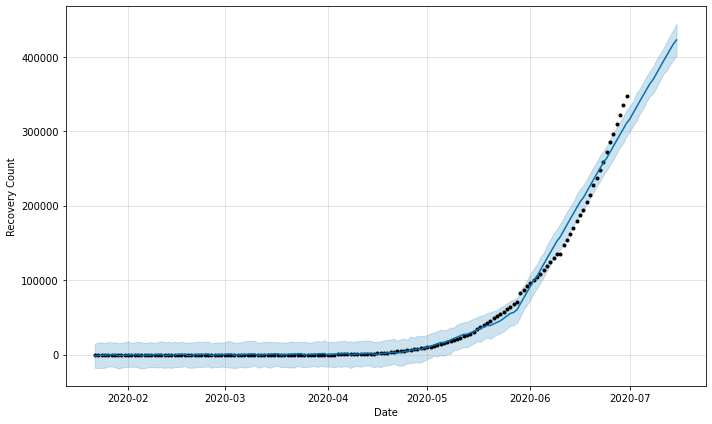

In [ ]:
figure_rec1 = plot_plotly(m_rec1, forecast_rec1)
py.iplot(figure_rec1) 

figure_rec1 = m_rec1.plot(forecast_rec1,xlabel='Date',ylabel='Recovery Count')

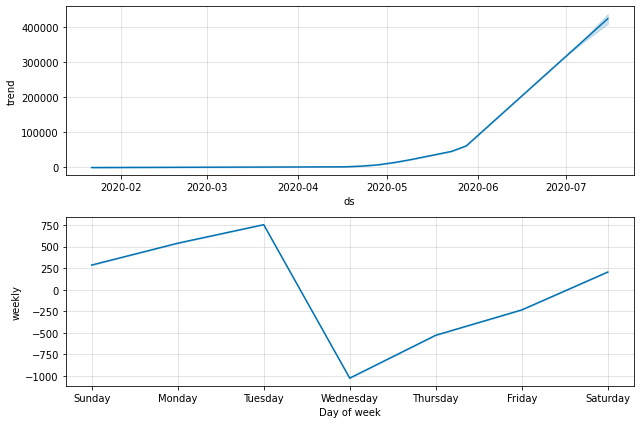

In [ ]:
figure_rec1=m_rec1.plot_components(forecast_rec1)


**For Death**


In [ ]:
prophet_dth1=iran_data.iloc[: , [4,6 ]].copy() 
prophet_dth1.tail()
prophet_dth1.columns = ['ds','y']
prophet_dth1.tail()

,ds,y
40847,2020-06-26,10239
41108,2020-06-27,10364
41369,2020-06-28,10508
41630,2020-06-29,10670
41891,2020-06-30,10817


In [ ]:
m_dth1=Prophet(interval_width=0.97)
m_dth1.fit(prophet_dth)
future_dth1=m_dth1.make_future_dataframe(periods=15)
forecast_dth1=m_dth1.predict(future_dth1)
forecast_dth1

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-10.385928,-162.201671,125.661590,-10.385928,-10.385928,-2.966850,-2.966850,-2.966850,-2.966850,-2.966850,-2.966850,0.0,0.0,0.0,-13.352779
1,2020-01-23,-9.648165,-159.746718,134.473309,-9.648165,-9.648165,0.311063,0.311063,0.311063,0.311063,0.311063,0.311063,0.0,0.0,0.0,-9.337103
2,2020-01-24,-8.910403,-167.486215,119.430108,-8.910403,-8.910403,-0.660258,-0.660258,-0.660258,-0.660258,-0.660258,-0.660258,0.0,0.0,0.0,-9.570660
3,2020-01-25,-8.172640,-149.113021,157.908477,-8.172640,-8.172640,-2.924188,-2.924188,-2.924188,-2.924188,-2.924188,-2.924188,0.0,0.0,0.0,-11.096828
4,2020-01-26,-7.434877,-155.514220,129.776501,-7.434877,-7.434877,-1.702434,-1.702434,-1.702434,-1.702434,-1.702434,-1.702434,0.0,0.0,0.0,-9.137311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2020-07-11,11499.027958,11175.368400,11806.905112,11181.822487,11810.208428,-2.924188,-2.924188,-2.924188,-2.924188,-2.924188,-2.924188,0.0,0.0,0.0,11496.103770
172,2020-07-12,11590.457051,11222.849030,11976.254560,11248.022332,11959.818154,-1.702434,-1.702434,-1.702434,-1.702434,-1.702434,-1.702434,0.0,0.0,0.0,11588.754617
173,2020-07-13,11681.886144,11236.382398,12087.564398,11297.546124,12087.090054,2.302902,2.302902,2.302902,2.302902,2.302902,2.302902,0.0,0.0,0.0,11684.189046
174,2020-07-14,11773.315237,11329.933803,12242.387584,11345.247175,12234.349898,5.639765,5.639765,5.639765,5.639765,5.639765,5.639765,0.0,0.0,0.0,11778.955002


In [ ]:
dth1 = forecast_dth.loc[:,['ds','trend']]
dth1 = dth1[dth1['trend']>0]
dth1=dth1.tail(15)
dth1.columns = ['Date','Death']
dth1.head()

,Date,Death
161,2020-07-01,10584.737026
162,2020-07-02,10676.166120
163,2020-07-03,10767.595213
164,2020-07-04,10859.024306
165,2020-07-05,10950.453399


**Graphical Representation of Predicted Death**

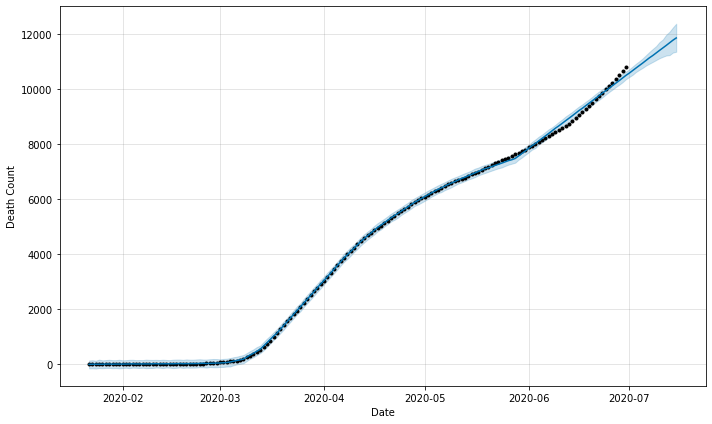

In [ ]:
figure_dth1 = plot_plotly(m_dth1, forecast_dth1)
py.iplot(figure_dth1) 

figure_dth1 = m_dth1.plot(forecast_dth1,xlabel='Date',ylabel='Death Count')

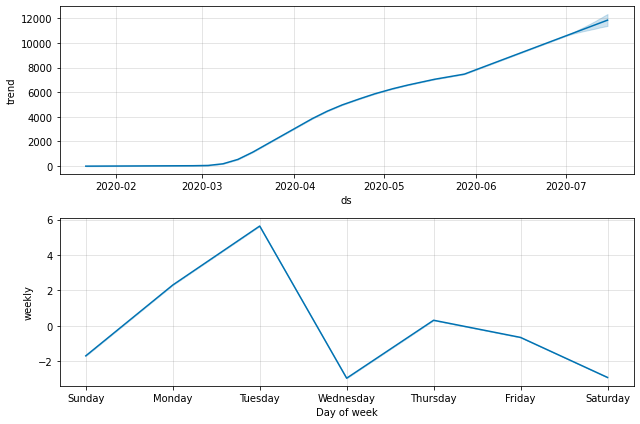

In [ ]:
figure_dth1=m_dth1.plot_components(forecast_dth1)

**Prediction Of The Future**

In [ ]:
prediction1 = cnfrm1
prediction1['Recover'] = rec.Recovery
prediction1['Death'] = dth.Death
prediction1.head()

,Date,Confirm,Recover,Death
166,2020-07-06,242855.890543,355552.052534,11041.882492
167,2020-07-07,245363.358765,363108.378194,11133.311585
168,2020-07-08,247870.826986,370664.703854,11224.740678
169,2020-07-09,250378.295208,378221.029514,11316.169771
170,2020-07-10,252885.763429,385777.355174,11407.598865


# **Forecasting data of India using Prophet**

**For Confirmed Cases in India**

In [ ]:
prophet=india_data.iloc[: , [4,5 ]].copy() 
prophet.tail(10)
prophet.columns = ['ds','y']
prophet.tail(10)

,ds,y
39540,2020-06-21,425282
39801,2020-06-22,440215
40062,2020-06-23,456183
40323,2020-06-24,473105
40584,2020-06-25,490401
40845,2020-06-26,508953
41106,2020-06-27,528859
41367,2020-06-28,548318
41628,2020-06-29,566840
41889,2020-06-30,585481


In [ ]:
m2=Prophet(interval_width=0.95)
m2.fit(prophet)
future2=m2.make_future_dataframe(periods=15)
forecast2=m2.predict(future2)
forecast2.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
166,2020-07-06,613305.228477,597825.529347,631531.127392,607820.558609,618559.320416,522.030190,522.030190,522.030190,522.030190,522.030190,522.030190,0.0,0.0,0.0,613827.258667
167,2020-07-07,625228.294680,609412.270048,644678.624196,618535.591041,631843.223767,815.698762,815.698762,815.698762,815.698762,815.698762,815.698762,0.0,0.0,0.0,626043.993442
168,2020-07-08,637151.360883,618806.152962,653212.381514,628679.236823,645072.011945,-852.222541,-852.222541,-852.222541,-852.222541,-852.222541,-852.222541,0.0,0.0,0.0,636299.138342
169,2020-07-09,649074.427086,631063.493366,667417.584408,639053.712974,659412.298053,-532.703490,-532.703490,-532.703490,-532.703490,-532.703490,-532.703490,0.0,0.0,0.0,648541.723595
170,2020-07-10,660997.493288,642678.631588,681077.024018,649127.937787,672580.701171,-372.887328,-372.887328,-372.887328,-372.887328,-372.887328,-372.887328,0.0,0.0,0.0,660624.605960
171,2020-07-11,672920.559491,655224.324103,692955.911025,659361.584763,685482.852620,12.893997,12.893997,12.893997,12.893997,12.893997,12.893997,0.0,0.0,0.0,672933.453488
172,2020-07-12,684843.625694,663843.211363,706849.923451,669556.508434,698919.193826,407.190410,407.190410,407.190410,407.190410,407.190410,407.190410,0.0,0.0,0.0,685250.816104
173,2020-07-13,696766.691897,674018.568780,718549.694187,679407.480326,712555.327914,522.030190,522.030190,522.030190,522.030190,522.030190,522.030190,0.0,0.0,0.0,697288.722087
174,2020-07-14,708689.758100,686161.496778,733281.285814,689254.877605,726255.485925,815.698762,815.698762,815.698762,815.698762,815.698762,815.698762,0.0,0.0,0.0,709505.456862
175,2020-07-15,720612.824303,693783.748742,744257.008424,699096.619273,740600.046396,-852.222541,-852.222541,-852.222541,-852.222541,-852.222541,-852.222541,0.0,0.0,0.0,719760.601762


In [ ]:
cnfrm2 = forecast2.loc[:,['ds','trend']]
cnfrm2 = cnfrm2[cnfrm2['trend']>0]
cnfrm2=cnfrm2.tail(10)
cnfrm2.columns = ['Date','Confirm']
cnfrm2.head()

,Date,Confirm
166,2020-07-06,613305.228477
167,2020-07-07,625228.294680
168,2020-07-08,637151.360883
169,2020-07-09,649074.427086
170,2020-07-10,660997.493288


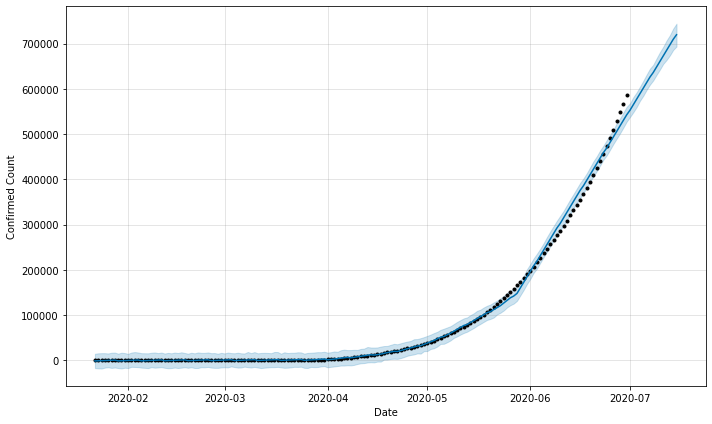

In [ ]:
figure2 = plot_plotly(m2, forecast2)
py.iplot(figure2) 

figure2 = m2.plot(forecast2,xlabel='Date',ylabel='Confirmed Count')

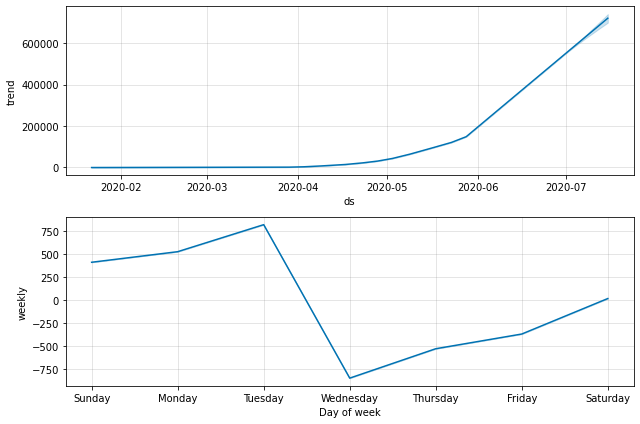

In [ ]:
figure=m2.plot_components(forecast2)

**For Recover Cases**

In [ ]:
prophet_rec2=india_data.iloc[: , [4,7 ]].copy() 
prophet_rec2.tail(10)
prophet_rec2.columns = ['ds','y']
prophet_rec2.tail(10)

,ds,y
39540,2020-06-21,237196
39801,2020-06-22,248190
40062,2020-06-23,258685
40323,2020-06-24,271697
40584,2020-06-25,285637
40845,2020-06-26,295881
41106,2020-06-27,309713
41367,2020-06-28,321723
41628,2020-06-29,334822
41889,2020-06-30,347912


In [ ]:
m2_rec=Prophet(interval_width=0.97)
m2_rec.fit(prophet_rec2)
future_rec2=m2_rec.make_future_dataframe(periods=15)
forecast_rec2=m2_rec.predict(future_rec2)
forecast_rec2

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-683.970289,-18584.744396,15286.447756,-683.970289,-683.970289,-1023.980207,-1023.980207,-1023.980207,-1023.980207,-1023.980207,-1023.980207,0.0,0.0,0.0,-1707.950496
1,2020-01-23,-663.641779,-17905.216035,14674.717675,-663.641779,-663.641779,-527.086848,-527.086848,-527.086848,-527.086848,-527.086848,-527.086848,0.0,0.0,0.0,-1190.728626
2,2020-01-24,-643.313268,-16640.905320,15903.439906,-643.313268,-643.313268,-233.496620,-233.496620,-233.496620,-233.496620,-233.496620,-233.496620,0.0,0.0,0.0,-876.809888
3,2020-01-25,-622.984757,-17835.201305,15781.585368,-622.984757,-622.984757,205.302623,205.302623,205.302623,205.302623,205.302623,205.302623,0.0,0.0,0.0,-417.682134
4,2020-01-26,-602.656247,-17315.859663,15276.329121,-602.656247,-602.656247,286.054471,286.054471,286.054471,286.054471,286.054471,286.054471,0.0,0.0,0.0,-316.601776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2020-07-11,393333.680833,375342.675977,411578.916072,382857.861705,403423.963776,205.302623,205.302623,205.302623,205.302623,205.302623,205.302623,0.0,0.0,0.0,393538.983457
172,2020-07-12,400890.006493,380927.904950,419960.950535,389214.566604,412085.300918,286.054471,286.054471,286.054471,286.054471,286.054471,286.054471,0.0,0.0,0.0,401176.060964
173,2020-07-13,408446.332153,388078.955582,428141.617616,395667.222278,420850.784196,539.214727,539.214727,539.214727,539.214727,539.214727,539.214727,0.0,0.0,0.0,408985.546880
174,2020-07-14,416002.657813,395497.752061,436080.454671,402056.767892,429806.113119,753.991854,753.991854,753.991854,753.991854,753.991854,753.991854,0.0,0.0,0.0,416756.649667


In [ ]:
rec2 = forecast_rec2.loc[:,['ds','trend']]
rec2 = rec2[rec2['trend']>0]
rec2=rec2.tail(15)
rec2.columns = ['Date','Recovery']
rec2.head()

,Date,Recovery
161,2020-07-01,317770.424235
162,2020-07-02,325326.749895
163,2020-07-03,332883.075555
164,2020-07-04,340439.401215
165,2020-07-05,347995.726874


**Graphical Representation of Predicted Recovery**

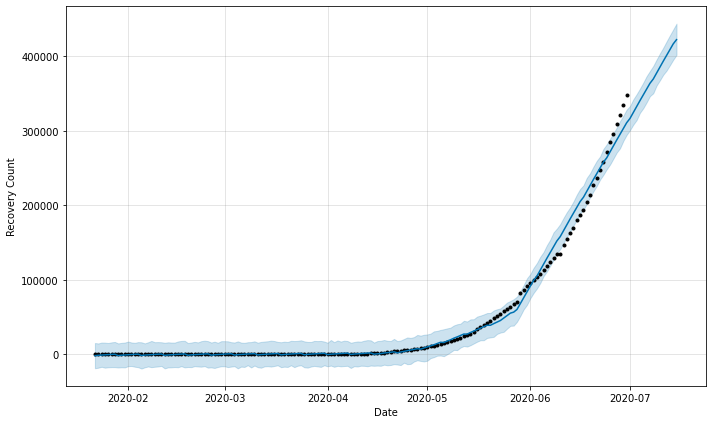

In [ ]:
figure_rec2 = plot_plotly(m2_rec, forecast_rec2)
py.iplot(figure_rec2) 

figure_rec2 = m2_rec.plot(forecast_rec2,xlabel='Date',ylabel='Recovery Count')

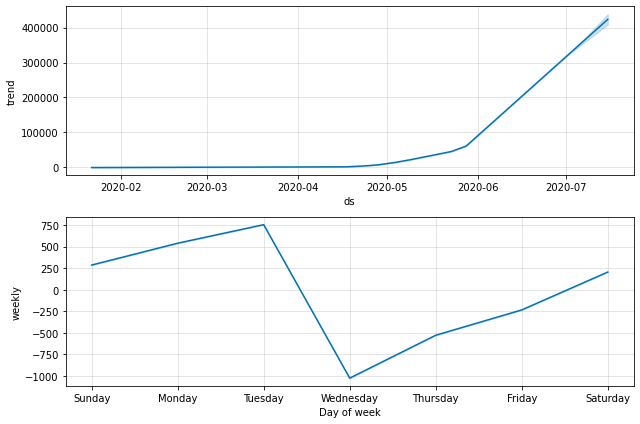

In [ ]:
figure_rec2=m2_rec.plot_components(forecast_rec2)


**For Death**

In [ ]:
prophet_dth2=india_data.iloc[: , [4,6 ]].copy() 
prophet_dth2.tail()
prophet_dth2.columns = ['ds','y']
prophet_dth2.tail()

,ds,y
40845,2020-06-26,15685
41106,2020-06-27,16095
41367,2020-06-28,16475
41628,2020-06-29,16893
41889,2020-06-30,17400


In [ ]:
m_dth2=Prophet(interval_width=0.97)
m_dth2.fit(prophet_dth)
future_dth2=m_dth2.make_future_dataframe(periods=15)
forecast_dth2=m_dth2.predict(future_dth2)
forecast_dth2

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-10.385928,-157.313973,128.372560,-10.385928,-10.385928,-2.966850,-2.966850,-2.966850,-2.966850,-2.966850,-2.966850,0.0,0.0,0.0,-13.352779
1,2020-01-23,-9.648165,-153.586379,142.593855,-9.648165,-9.648165,0.311063,0.311063,0.311063,0.311063,0.311063,0.311063,0.0,0.0,0.0,-9.337103
2,2020-01-24,-8.910403,-147.425197,135.654882,-8.910403,-8.910403,-0.660258,-0.660258,-0.660258,-0.660258,-0.660258,-0.660258,0.0,0.0,0.0,-9.570660
3,2020-01-25,-8.172640,-153.580502,136.729710,-8.172640,-8.172640,-2.924188,-2.924188,-2.924188,-2.924188,-2.924188,-2.924188,0.0,0.0,0.0,-11.096828
4,2020-01-26,-7.434877,-151.185903,135.467304,-7.434877,-7.434877,-1.702434,-1.702434,-1.702434,-1.702434,-1.702434,-1.702434,0.0,0.0,0.0,-9.137311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2020-07-11,11499.027958,11166.410461,11870.264795,11167.394520,11837.513233,-2.924188,-2.924188,-2.924188,-2.924188,-2.924188,-2.924188,0.0,0.0,0.0,11496.103770
172,2020-07-12,11590.457051,11200.860462,12000.722197,11209.464531,11974.759589,-1.702434,-1.702434,-1.702434,-1.702434,-1.702434,-1.702434,0.0,0.0,0.0,11588.754617
173,2020-07-13,11681.886144,11259.467699,12102.869009,11251.826637,12120.734539,2.302902,2.302902,2.302902,2.302902,2.302902,2.302902,0.0,0.0,0.0,11684.189046
174,2020-07-14,11773.315237,11299.712762,12247.360587,11294.172508,12261.081148,5.639765,5.639765,5.639765,5.639765,5.639765,5.639765,0.0,0.0,0.0,11778.955002


**Graphical Representation of Predicted Recovery**

In [ ]:
dth2 = forecast_dth2.loc[:,['ds','trend']]
dth2 = dth2[dth2['trend']>0]
dth2=dth2.tail(15)
dth2.columns = ['Date','Death']
dth2.head()

,Date,Death
161,2020-07-01,10584.737026
162,2020-07-02,10676.166120
163,2020-07-03,10767.595213
164,2020-07-04,10859.024306
165,2020-07-05,10950.453399


**Graphical Representation of Predicted Death**

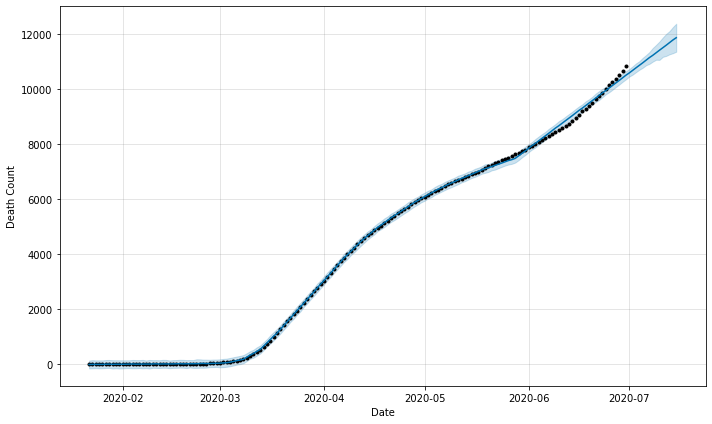

In [ ]:
figure_dth2 = plot_plotly(m_dth2, forecast_dth2)
py.iplot(figure_dth2) 

figure_dth2 = m_dth2.plot(forecast_dth2,xlabel='Date',ylabel='Death Count')

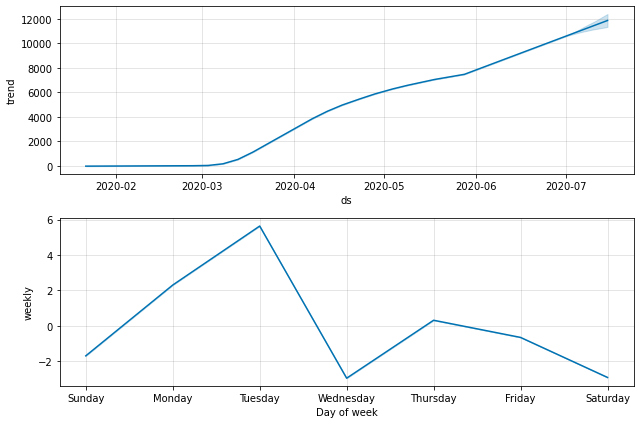

In [ ]:
figure_dth2=m_dth2.plot_components(forecast_dth2)

**Prediction Of The Future**

In [ ]:
prediction2 = cnfrm1
prediction2['Recover'] = rec2.Recovery
prediction2['Death'] = dth2.Death
prediction2.head()

,Date,Confirm,Recover,Death
166,2020-07-06,242855.890543,355552.052534,11041.882492
167,2020-07-07,245363.358765,363108.378194,11133.311585
168,2020-07-08,247870.826986,370664.703854,11224.740678
169,2020-07-09,250378.295208,378221.029514,11316.169771
170,2020-07-10,252885.763429,385777.355174,11407.598865


# **Inference drawn after plotting Visualizations of India and Iran**


* When we plot visualizations using **plotly** of India and Iran respectively , at a glance the trend of COVID-19 prevailing in these two countries seemed to be similar.

*   But ,in actual, when we see the visualization that has been plotted using **plot_components**, we could easily see the difference between them.

* Hence, there is difference in the trends of COVID-19, in India and Iran 

* For the justification of my inference , the visualizations plotted above could be referred.





- 